In [1]:
# %load_ext dotenv

from benchmark import test_performance

Creating Local DHT as db...


In [3]:
times = test_performance()

# Print values
print(f"N\tBuying\tCheckout\tTotal")
for shard_number in [1, 10, 100, 1000, 10000]:
    a = times[shard_number]
    print(f"{shard_number}\t{a['buying']}\t{a['checkout']}\t{a['total']}")


N	Buying	Checkout	Total
1	155308	1131	156439
10	98870	1278	100148
100	94249	1062	95311
1000	95452	1035	96487
10000	93686	1065	94751


In [4]:
import pandas as pd

times = {}
dfs = {}
for shard in [1, 10, 100, 1000, 10000]:
    times[shard] = []

for i in range(4):
    t = test_performance()
    for shard in [1, 10, 100, 1000, 10000]:
        times[shard].append(t[shard])

for shard in [1, 10, 100, 1000, 10000]:
    dfs[shard] = pd.DataFrame(times[shard])
    print(dfs[shard].describe())
    # df.to_csv("times.tsv", sep="\t")

              buying     checkout          total
count       4.000000     4.000000       4.000000
mean    99460.750000  1123.750000  100584.500000
std     12421.305497    34.769479   12448.587939
min     88172.000000  1093.000000   89293.000000
25%     92919.500000  1104.250000   94030.750000
50%     96315.000000  1114.500000   97415.500000
75%    102856.250000  1134.000000  103969.250000
max    117041.000000  1173.000000  118214.000000
             buying     checkout         total
count      4.000000     4.000000      4.000000
mean   92531.250000  1221.000000  93752.250000
std     2951.374411   200.590794   2921.178002
min    89887.000000  1080.000000  90967.000000
25%    90430.750000  1086.000000  91832.500000
50%    91918.500000  1147.500000  93217.000000
75%    94019.000000  1282.500000  95136.750000
max    96401.000000  1509.000000  97608.000000
             buying     checkout          total
count      4.000000     4.000000       4.000000
mean   92981.250000  1062.250000   94043

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns

%matplotlib inline

all_times = []
for i in range(4):
    times = test_performance()
    for shard, time in times.items():
        time["N"] = shard
        all_times.append(time)
        
df = pd.DataFrame(all_times)


N
1        AxesSubplot(0.125,0.125;0.775x0.755)
10       AxesSubplot(0.125,0.125;0.775x0.755)
100      AxesSubplot(0.125,0.125;0.775x0.755)
1000     AxesSubplot(0.125,0.125;0.775x0.755)
10000    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

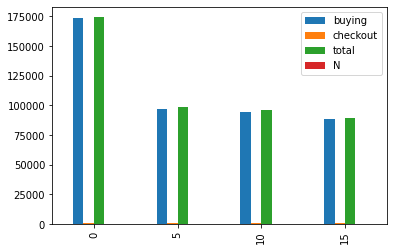

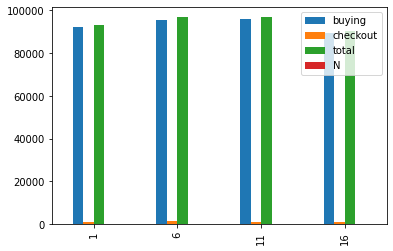

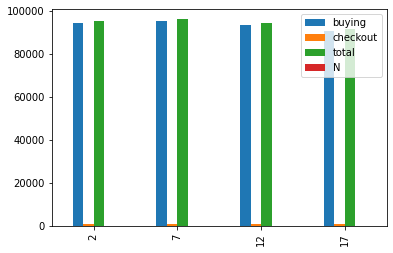

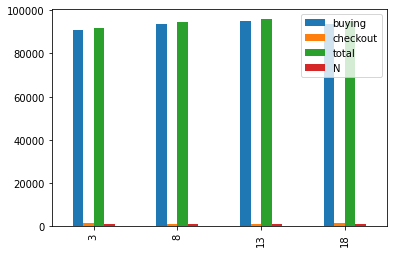

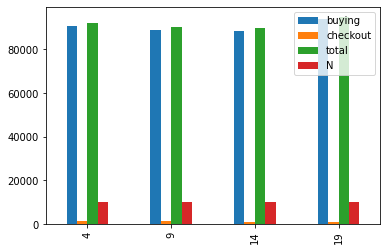

In [7]:
df.groupby("N").plot(kind='bar', rot=90)

Text(0, 0.5, 'Runtime (us)')

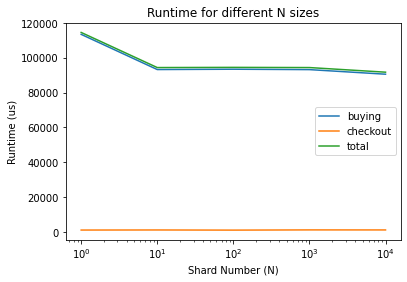

In [8]:
df2 = df[["buying"]]
df2 = df.groupby("N").mean()
# df2.columns.droplevel(0)

ax = df2.plot()
ax.set_xscale('log')
ax.set_title('Runtime for different N sizes')
ax.set_xlabel('Shard Number (N)')
ax.set_ylabel('Runtime (us)')

In [9]:
df3 = df2.rename(columns={
    'buying': 'Buying - Local',
    'checkout': 'Checkout - Local',
    'total': 'Total - Local',
})
# df4 = df2.rename(columns={
#     'buying': 'Buying - Azure',
#     'checkout': 'Checkout - Azure',
#     'total': 'Total - Azure',
# })

In [14]:
# df4.to_csv('results/benchmark_azure.tsv', sep='\t')
# df3.to_csv('results/benchmark_local.tsv', sep='\t')

df4 = pd.read_csv('results/benchmark_azure.tsv', sep='\t').set_index('N')
df3 = pd.read_csv('results/benchmark_local.tsv', sep='\t').set_index('N')

Text(0, 0.5, 'Runtime (us)')

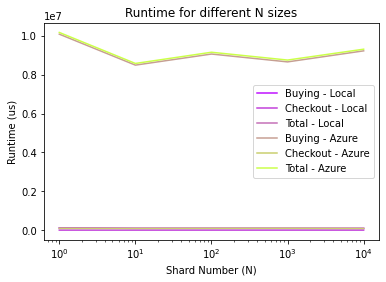

In [19]:
ax = pd.concat([df3, df4], axis=1).plot(color=["#BF0FFF","#C13FDB","#C46FB6","#C69F92","#C9CF6D","#CBFF49"]
)
ax.set_xscale('log')
ax.set_title('Runtime for different N sizes')
ax.set_xlabel('Shard Number (N)')
ax.set_ylabel('Runtime (us)')